In [1]:
import numpy as np

from math import pi
from qiskit import QuantumCircuit, Aer, assemble
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import plot_bloch_multivector, plot_histogram

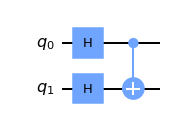

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


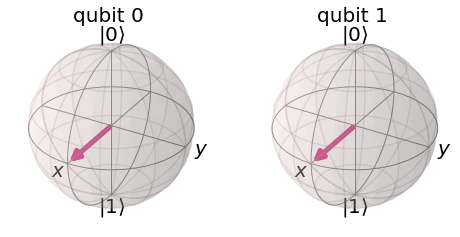

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
display(qc.draw())

svsim = Aer.get_backend('statevector_simulator') # to generate state vector
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

**CNOT acts on the state: |++> = 1/2(|00> + |01> + |10> + |11>)**

# Put target qubit in negative phase

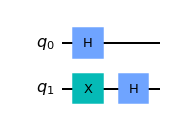

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


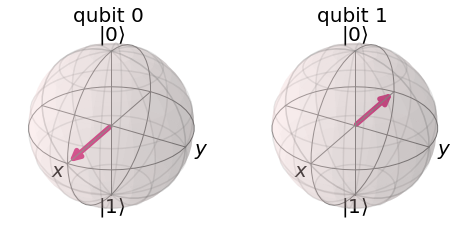

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw())

qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

**This represents the state: |-+> = 1/2(|00> + |01> - |10> - |11>)**

# Swap amplitudes of |01> and |11>

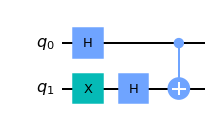

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


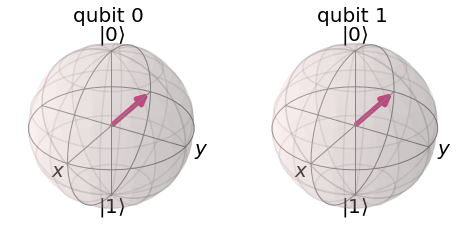

In [4]:
qc.cx(0,1) # swap amplitudes of |01> and |11>
display(qc.draw())

qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

This represents the state- **CNOT|-+> = 1/2(|00> - |01> - |10> + |11>) = |-->**

This has **affected the state of control qubit** while leaving the state of **target qubit unchanged**

It is important to note the H gate transforms:
* |+> => |0>
* |-> => |1> 

Thus **wrapping CNOT in H gates** has the equivalent behaviour of a CNOT acting in the opposite direction

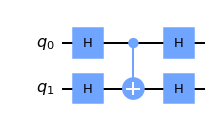

<IPython.core.display.Math object>

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

This identity is an example of phase kickback